## 決策樹

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [5]:
iris.data
iris.data.shape

(150, 4)

In [6]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(iris.data, iris.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [10]:
predicted = clf.predict(iris.data)

In [13]:
sum(predicted == iris.target)/len(iris.target)

1.0

In [14]:
from sklearn import tree
tree.export_graphviz(clf, out_file='tree.dot') 

In [15]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(iris.data, iris.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [16]:
from sklearn import tree
tree.export_graphviz(clf, out_file='tree.dot') 

## Webgraphviz
- http://www.webgraphviz.com/

## 畫出決策邊界

In [17]:
from itertools import product

import numpy as np
import matplotlib.pyplot as plt

from sklearn. datasets import load_iris
from sklearn import tree

iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

clf = tree.DecisionTreeClassifier(max_depth=2)
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

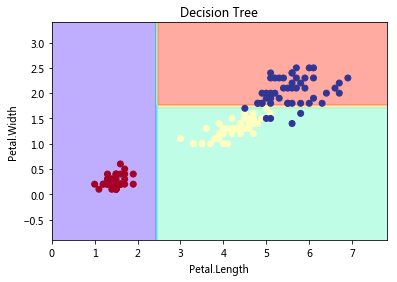

In [18]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

plt.plot()
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.rainbow)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, cmap = plt.cm.RdYlBu)
plt.title('Decision Tree')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.show()


## Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(iris.data, iris.target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
predicted = clf.predict(iris.data)

In [25]:
sum(predicted == iris.target) / len(iris.target)

0.95999999999999996

In [26]:
from itertools import product

import numpy as np
import matplotlib.pyplot as plt

from sklearn. datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

clf = LogisticRegression()
clf.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

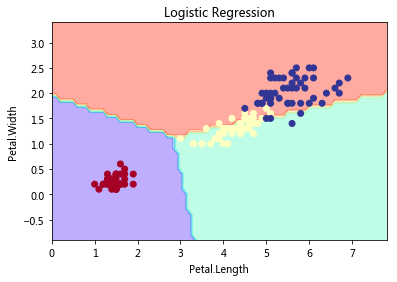

In [28]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

plt.plot()
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.rainbow)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, cmap = plt.cm.RdYlBu)
plt.title('Logistic Regression')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.show()


## SVM

In [29]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
iris = load_iris()

X = iris.data[0:100,[2,3]]
y = iris.target[0:100]

clf1 = SVC(kernel="linear")
clf1.fit(X, y)

clf2 = LogisticRegression()
clf2.fit(X, y)




LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
def plot_estimator(estimator, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.plot()
    plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y,  cmap = plt.cm.brg)
    plt.xlabel('Petal.Length')
    plt.ylabel('Petal.Width')
    plt.show()

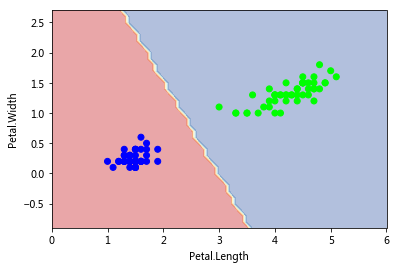

In [31]:
plot_estimator(clf1,X,y)

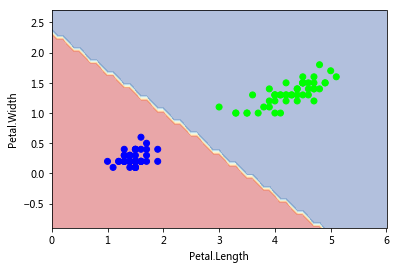

In [32]:
plot_estimator(clf2, X,y)

## Regularization Term

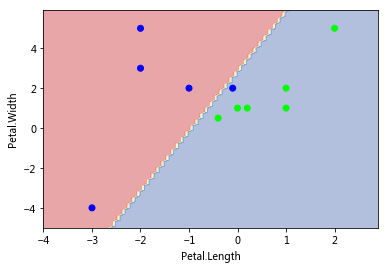

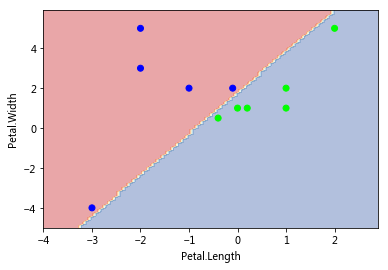

In [33]:
data = np.array([[-1,2,0],[-2,3,0],[-2,5,0],[-3,-4,0],[-0.1,2,0],[0.2,1,1],[0,1,1],[1,2,1], [1,1,1], [-0.4,0.5,1],[2,5,1]])
X = data[:, :2] 
Y = data[:,2]

# Large Margin
clf = SVC(C=1.0, kernel='linear')
clf.fit(X, Y)
plot_estimator(clf,X,Y)

# Narrow Margin
clf = SVC(C=100000, kernel='linear')
clf.fit(X, Y)
plot_estimator(clf,X,Y)


In [34]:
from itertools import product
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.svm import SVC

iris = load_iris()
X = iris.data[:,[2,3]]
y = iris.target


In [35]:
clf1 = SVC(kernel="rbf")
clf1.fit(X, y)

clf2 = SVC(kernel="poly")
clf2.fit(X, y)

clf3 = SVC(kernel="linear")
clf3.fit(X, y)



SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3_1\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f', 'title', 'product', 'clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


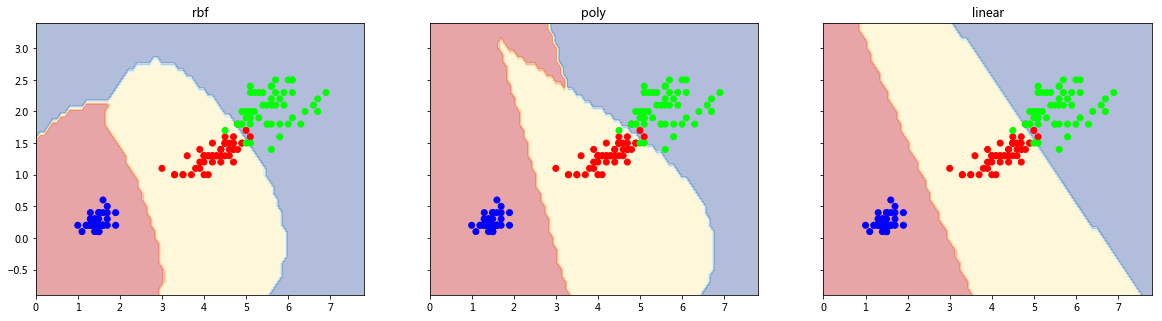

In [37]:
%pylab inline
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(20, 5))

for idx, clf, title in zip([0,1,2],[clf1, clf2, clf3], ['rbf', 'poly', 'linear']):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx].contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.RdYlBu)
    axarr[idx].scatter(X[:, 0], X[:, 1], c=y,  cmap = plt.cm.brg)
    axarr[idx].set_title(title)


## Model Evaluation

In [48]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
iris = load_iris()
clf = LogisticRegression()
clf.fit(iris.data, iris.target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [52]:
predicted = clf.predict(iris.data)
#clf.predict_proba(iris.data)

In [40]:
sum(iris.target == predicted) / len(iris.target)

0.95999999999999996

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(iris.target, predicted)

0.95999999999999996

In [44]:
from sklearn.metrics import confusion_matrix
print(clf.classes_)
m = confusion_matrix(iris.target, predicted)
print(m)

[0 1 2]
[[50  0  0]
 [ 0 45  5]
 [ 0  1 49]]


Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3_1\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['title', 'f', 'clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


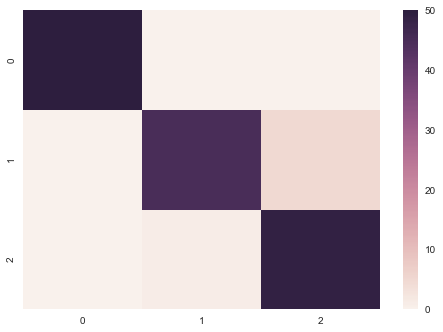

In [45]:
%pylab inline
import seaborn
seaborn.heatmap(m)

In [46]:
from sklearn.metrics import classification_report
print(classification_report(iris.target, predicted))


             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.98      0.90      0.94        50
          2       0.91      0.98      0.94        50

avg / total       0.96      0.96      0.96       150



In [53]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()
clf = DecisionTreeClassifier()
clf.fit(iris.data, iris.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [55]:
predicted  = clf.predict(iris.data)

In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(iris.target, predicted)

1.0

In [57]:
from sklearn.metrics import confusion_matrix
print(clf.classes_)
m = confusion_matrix(iris.target, predicted)
print(m)

[0 1 2]
[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]


In [58]:
from sklearn.metrics import classification_report
print(classification_report(iris.target, predicted))


             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       1.00      1.00      1.00        50
          2       1.00      1.00      1.00        50

avg / total       1.00      1.00      1.00       150



## Cross Validation

In [59]:
X = iris.data
y = iris.target

In [60]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.33, random_state = 123)


In [62]:
train_X.shape

(100, 4)

In [63]:
test_X.shape

(50, 4)

In [64]:
train_y

array([2, 0, 0, 1, 1, 1, 1, 2, 1, 2, 0, 2, 1, 0, 0, 2, 1, 2, 2, 0, 1, 1, 2,
       0, 2, 1, 1, 0, 2, 2, 0, 0, 1, 1, 2, 0, 0, 1, 0, 1, 2, 0, 2, 0, 0, 1,
       0, 0, 1, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 1, 1, 1, 2, 1, 1, 1, 2, 0, 0,
       1, 2, 2, 2, 2, 0, 1, 0, 1, 1, 0, 1, 2, 1, 2, 2, 0, 1, 0, 2, 2, 1, 1,
       2, 2, 1, 0, 1, 1, 2, 2])

In [65]:
test_y

array([1, 2, 2, 1, 0, 2, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 2, 0,
       2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2, 2, 2,
       2, 1, 0, 0])

In [66]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [68]:
predicted = clf.predict(test_X)

In [69]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, predicted)

array([[20,  0,  0],
       [ 0, 11,  0],
       [ 0,  2, 17]])

In [71]:
from sklearn.metrics import classification_report
print(classification_report(test_y, predicted))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        20
          1       0.85      1.00      0.92        11
          2       1.00      0.89      0.94        19

avg / total       0.97      0.96      0.96        50



In [76]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 10)
acc = [] 
for train, test in kf.split(X):
    train_X, test_X, train_y, test_y = X[train], X[test] , y[train], y[test]
    clf = DecisionTreeClassifier()
    clf.fit(train_X, train_y)
    predicted = clf.predict(test_X)
    acc.append(accuracy_score(test_y,predicted))

In [78]:
mean(acc)
std(acc)


0.084327404271156786

In [80]:
from sklearn.model_selection import cross_val_score
acc = cross_val_score(clf, X= iris.data, y = iris.target)

In [83]:
acc.mean()

0.9673202614379085

In [84]:
acc.std()

0.033326924925443056

In [86]:
from sklearn.model_selection import LeaveOneOut

res = []
loo = LeaveOneOut()
for train, test in loo.split(X):
    train_X, test_X, train_y, test_y = X[train],X[test], y[train], y[test]
    clf = DecisionTreeClassifier()
    clf.fit(train_X, train_y)
    predicted = clf.predict(test_X)
    res.extend((predicted == test_y).tolist())
sum(res) / 150


0.95999999999999996

## ROC Curve

In [90]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(iris.data, iris.target)
clf.predict(iris.data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [92]:
#clf.predict_proba(iris.data)

In [93]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

iris = load_iris()
X = iris.data[50:150,]

le = preprocessing.LabelEncoder()
y = le.fit_transform(iris.target[50:150])
y


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [97]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.33, random_state = 123)
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [99]:
#clf.predict(test_X)
proba_ = clf.predict_proba(test_X)

In [132]:
from sklearn.metrics import confusion_matrix
import numpy as np
tpr_ary = [0]
fpr_ary = [0]
for threshold in range(0,11):
    threshold = threshold * 0.1
    predicted = (proba_[:,1] > threshold).astype(int)
    m = confusion_matrix(test_y, predicted)
    tp = m[0,0]
    fn = m[1,0]
    fp = m[0,1]
    tn = m[1,1]
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    
    if (not np.isnan(tpr)) and (not np.isnan(fpr)):        
        tpr_ary.append(tpr)
        fpr_ary.append(fpr)

tpr_ary.append(1)
fpr_ary.append(1)


C:\ProgramData\Anaconda3_1\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in long_scalars
  


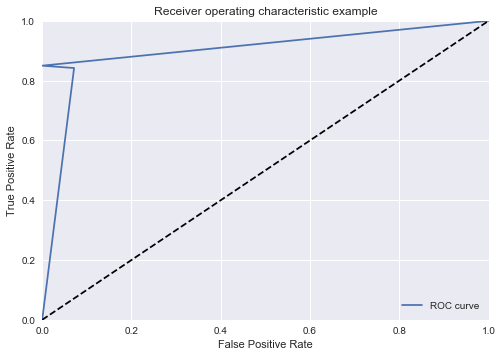

In [133]:
import matplotlib.pyplot as plt
plt.plot(fpr_ary, tpr_ary,label='ROC curve')
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [134]:
probas_ = clf.fit(train_X, train_y).predict_proba(test_X)
probas_[:, 1]

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_y, probas_[:, 1])


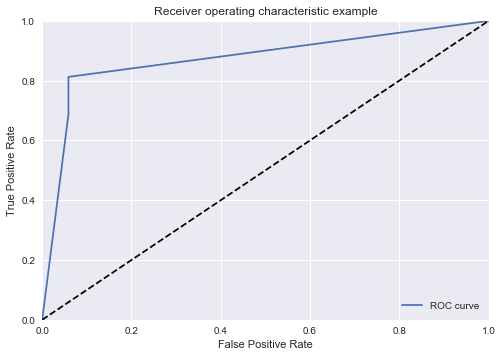

In [135]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


In [136]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.87316176470588236

In [139]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

clf1 = DecisionTreeClassifier()
clf1.fit(train_X, train_y)

clf2 = SVC(probability=True)
clf2.fit(train_X, train_y)

clf3 = LogisticRegression()
clf3.fit(train_X, train_y)

clf4 = RandomForestClassifier()
clf4.fit(train_X, train_y)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

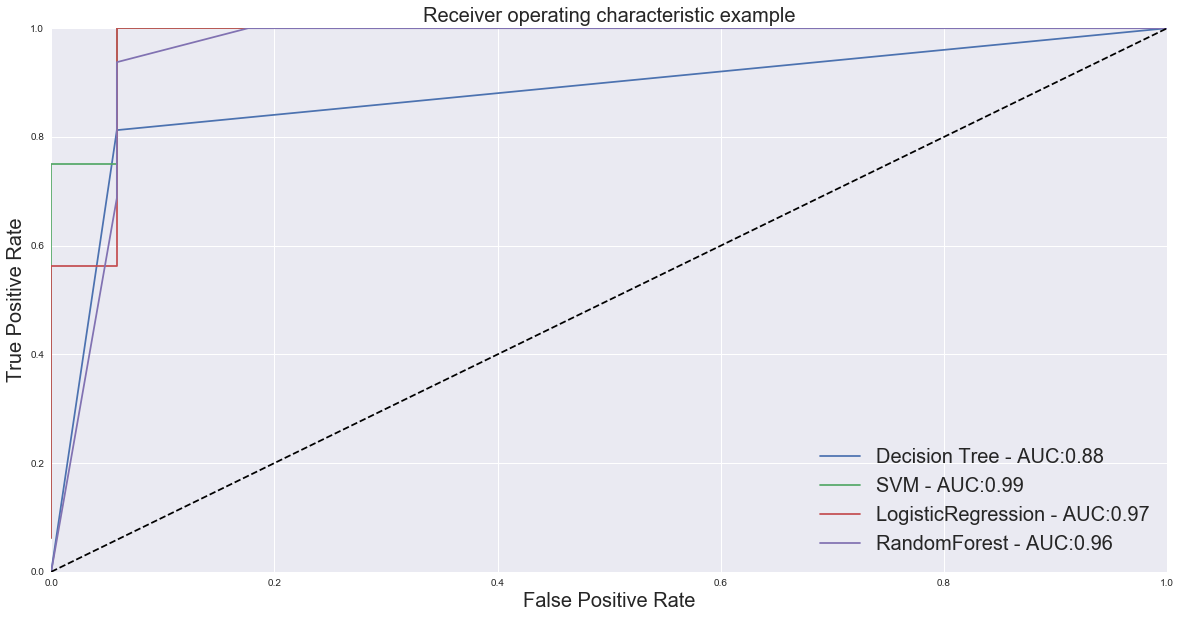

In [140]:
plt.figure(figsize= [20,10])
for clf, title in zip([clf1,clf2,clf3, clf4], ['Decision Tree', 'SVM', 'LogisticRegression', 'RandomForest']):
    probas_ = clf.fit(train_X, train_y).predict_proba(test_X)
    fpr, tpr, thresholds = roc_curve(test_y, probas_[:, 1])
    plt.plot(fpr, tpr, label='%s - AUC:%.2f'%(title, auc(fpr, tpr)) )
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('Receiver operating characteristic example', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.show()
